*Contenuti*
===
- [Il dataset OPSD](#Il-dataset-OPSD)
- [Indicizzazione temporale](#Indicizzazione-temporale)
    - [*to_datetime* e *Timestamp*](#to_datetime-e-Timestamp)
    - [*DatetimeIndex* e sue proprietà](#DatetimeIndex-e-sue-proprietà)
    - [Caricamento indicizzato](#Caricamento-indicizzato)
    - [String e partial-string indexing](#String-e-partial-string-indexing)
    - [Esercizio 1.1](#Esercizio-1.1)
- [Serie temporali](#Serie-temporali)
    - [Definizione; analysis vs forecast](#Definizione;-analysis-vs-forecast)
    - [Serie univariate e multivariate](#Serie-univariate-e-multivariate)
    - [Serie even e uneven; gestione della frequenza](#Serie-even-e-uneven;-gestione-della-frequenza)
- [Visualizzazione di serie temporali](#Visualizzazione-di-serie-temporali)
    - [Matplotlib e Seaborn](#Matplotlib-e-Seaborn)
    - [Esempi di plot](#Esempi-di-plot)
    - [Plot multipli](#Plot-multipli)
- [Analisi della stagionalità](#Analisi-della-stagionalità)
    - [Esercizio 1.2](#Esercizio-1.2)
    - [*groupby*](#groupby)
    - [Boxplots](#Boxplots)
    - [Esercizio 1.3](#Esercizio-1.3)
    - [Resampling](#Resampling)
    - [Esercizio 1.4](#Esercizio-1.4)

In [5]:
import pandas as pd

Abbiamo importato **Pandas**, la libreria Python di manipolazione dati. La sfrutteremo per analizzare dati di consumo elettrico.

Il dataset OPSD
---

<img src='img/OPSD.png' width=250/>

<br>

Il dataset **OPSD_Germany_consumption** riporta il consumo elettrico totale tedesco (in GWh) dal 2006 al 2017. Questi dati fanno parte del progetto OPSD: https://open-power-system-data.org/.



Iniziamo caricando il dataset in formato *dataframe*, la struttura dati base di Pandas. L'unico argomento obbligatorio della funzione *read_csv* è il path del file .csv che vogliamo caricare. Le funzioni *head* e *tail* mostrano rispettivamente i primi e ultimi record (5 di default) del dataframe.

In [6]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv')
df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


In [7]:
df.tail()

,Date,Consumption
4378,2017-12-27,1263.94091
4379,2017-12-28,1299.86398
4380,2017-12-29,1295.08753
4381,2017-12-30,1215.44897
4382,2017-12-31,1107.11488


In [8]:
df.shape

(4383, 2)

Pandas eredita la funzione *shape* da NumPy. Il dataframe contiene 4383 record: per ogni riga, oltre all'informazione di consumo, è disponibile la data a cui essa fa riferimento.

Pandas, all'atto del caricamento, dota il dataframe di una struttura di indici. Attraverso la sintassi

        df.loc[position]
        
è possibile accedere all'elemento che si trova all'indice *position*.

In [9]:
df.loc[3]

Date           2006-01-04
Consumption       1457.22
Name: 3, dtype: object

Siamo abituati ad associare le colonne di un dataset alle *feature* di un problema di apprendimento. Consideriamo la colonna 'Date': è una feature speciale? Che ruolo può avere nel machine learning? 

Diamo un'occhiata al suo contenuto.

In [10]:
df['Date'].dtype

dtype('O')

In Pandas il tipo 'O' sta per *Object*: in generale, una stringa.

In [11]:
df['Date'].loc[0]

'2006-01-01'

Pandas ha caricato i record di questa colonna come semplici stringhe.

Indicizzazione temporale
===
Vogliamo associare ai record del dataframe una struttura temporale.

*to_datetime* e *Timestamp*
---
La funzione *to_datatime* trasforma una stringa in un oggetto dotato di logica temporale.

In [12]:
pd.to_datetime('10-02-09')

Timestamp('2009-10-02 00:00:00')

La funzione ha provato a inferire autonomamente il formato della data: 2 ottobre 2009. Attraverso gli argomenti opzionali è possibile guidare la trasformazione.

In [13]:
pd.to_datetime('10-02-09', yearfirst=True)

Timestamp('2010-02-09 00:00:00')

In [10]:
pd.to_datetime('10-02-09', dayfirst=True)

Timestamp('2009-02-10 00:00:00')

La funzione gestisce formati diversi. 

In [14]:
pd.to_datetime('Jan 3 2019')

Timestamp('2019-01-03 00:00:00')

Oltre ad una singola stringa possiamo convertire liste di stringhe; ad esempio, possiamo trasformare l'intera colonna Date.

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


A prima vista non è cambiato niente. Controlliamo meglio: di che tipo è la colonna trasformata?

In [13]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
dtype: object

Perché il tipo ha questo nome? Python considera gli oggetti temporali come interi a 64 bit, in modo tale da poter gestire la precisione fino al nanosecondo (ns).

*DatetimeIndex* e sue proprietà
---
Siamo interessati ad analizzare i consumi *nel tempo*. La colonna Date può essere usata come indice.

In [16]:
df.set_index('Date').head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [17]:
df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


Attenzione: quasi tutte le funzioni Pandas restituiscono una copia dell'oggetto che costruiscono. Perché le modifiche abbiano effetto occorre sovrascrivere il dataframe di partenza (oppure assegnare il risultato ad un nuovo dataframe).

In [18]:
df = df.set_index('Date')

df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


Adesso df è correttamente indicizzato dalla colonna Date. Guardiamo come è fatto questo nuovo indice.

In [19]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

*DatetimeIndex* è un indice particolare di Pandas, con delle proprietà specifiche.

In [20]:
df.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [21]:
df.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=4383)

Caricamento indicizzato
---
Prima di esplorare l'indicizzazione temporale facciamo un passo indietro. Attraverso la funzione read_csv è possibile caricare il dataframe gestendo direttamente l'indicizzazione temporale.

Ricordiamoci che è possibile accedere alla documentazione di una funzione attraverso la sequenza

    Shift Tab (Tab Tab)
    
eseguita col cursore posizionato accanto al nome della funzione. Tra gli argomenti opzionali di read_csv troviamo:

- parse_dates
- index_col

che automatizzano quanto visto in precedenza.

In [22]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv',
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
dtypes: float64(1)
memory usage: 68.5 KB


**Recap**: abbiamo caricato il dataset OPSD_Germany_consumption, imponendo la colonna Date come indice temporale.

String e partial-string indexing
---

Adesso che ai record del dataframe è associato un riferimento temporale, possiamo accedervi in modo comodo. Supponiamo di voler sapere il consumo elettrico di Natale 2015.

In [26]:
df.loc['2015-12-25']

Consumption    1047.277
Name: 2015-12-25 00:00:00, dtype: float64

Resta valido l'automatismo nel riconoscimento dei vari formati di data.

In [27]:
df.loc['Dec 25 2015']

Consumption    1047.277
Name: 2015-12-25 00:00:00, dtype: float64

Supponiamo di voler confrontare questo dato con la sua media mensile. Un modo per estrarre il mese di dicembre 2015 è attraverso lo *string indexing*, simile all'indicizzazione NumPy. Attenzione: entrambi gli estremi dell'indicizzazione sono inclusi nel risultato.

In [28]:
df['2015-12-1':'2015-12-31']

,Consumption
Date,
2015-12-01,1588.021
2015-12-02,1585.308
2015-12-03,1577.457
2015-12-04,1570.318
2015-12-05,1337.095
2015-12-06,1232.073
2015-12-07,1536.251
2015-12-08,1572.740
2015-12-09,1586.393


Un'altra tecnica disponibile quando l'indice è temporale è il *partial-string indexing*. Specificando mese e anno, estraiamo i soli record di dicembre 2015.

In [29]:
df['2015-12']

,Consumption
Date,
2015-12-01,1588.021
2015-12-02,1585.308
2015-12-03,1577.457
2015-12-04,1570.318
2015-12-05,1337.095
2015-12-06,1232.073
2015-12-07,1536.251
2015-12-08,1572.740
2015-12-09,1586.393


Ed ecco il consumo medio di dicembre 2015.

In [30]:
df['2015'].mean()

Consumption    1384.286474
dtype: float64

Esercizio 1.1
---

Il dataset **OPSD_Germany_all** contiene, oltre al consumo, le produzioni giornaliere di energia eolica e solare.

- Caricare il dataset in formato dataframe, usando la colonna *Date* come indice temporale;
- i dati di produzione di energia solare non sono disponibili fino al 31 dicembre 2011; selezionare, dal dataframe, solo i record posteriori a tale data (compresa);
- costruire la colonna *Renewable* come somma delle produzioni eolica e solare;
- calcolare il rapporto tra
    - a) la produzione rinnovabile totale di settembre 2014 e
    - b) il consumo totale dello stesso mese;
- sfruttando le proprietà dell'indice Date (**suggerimento**: *index.day_name()*), costruire la colonna 'Weekday' contenente, per ogni record, il giorno della settimana (Monday, Tuesday, ...);
- costruire la colonna *df_sunday_wind* contenente la produzione eolica delle sole domeniche;
- calcolare la produzione eolica media domenicale tra gennaio e marzo 2017 (inclusi).

Serie temporali
===

Definizione; analysis vs forecast
---

Come interviene il concetto di tempo nel machine learning classico? Un modello, una volta addestrato, viene testato sui dati *futuri* via via disponibili. In generale, però, durante l'apprendimento i dati del training set vengono trattati tutti allo stesso modo; non vengono cioè ordinati temporalmente.

<h3><center><i>Una serie temporale è una sequenza di dati osservati sequenzialmente.</i></center></h3>

Rispetto ad un dataset classico di apprendimento aggiunge dipendenza temporale tra i record.

Si parla di **analysis** quando siamo interessati a capire e descrivere una serie temporale di dati passati. Questa analisi non è necessariamente mirata alla predizione del futuro. Quando, viceversa, siamo interessati al futuro di una serie temporale (e sfruttiamo il suo passato per fare previsioni), stiamo facendo **forecast**.

Serie univariate e multivariate
---

Una serie temporale si dice **univariata** se consiste di una sola variabile osservata sequenzialmente. Si pensi, ad esempio, alle vendite di un certo prodotto o alla temperatura minima giornaliera. Il dataset visto all'inizio della lezione è un esempio di serie univariata.

<img src='img/uni.png' width=500/>

In una serie **multivariata** più quantità variano nel tempo. Per esempio, un sistema fisico in cui è nota, in ogni istante, la velocità lungo i tre assi coordinati $x$, $y$ e $z$. Il dataset **OPSD_Germany_all** è una serie multivariata.

<img src='img/multi.png' width=500/>

Serie even e uneven; gestione della frequenza
---

In [28]:
pd.date_range('2020-03-09', '2020-05-04', freq='D')

DatetimeIndex(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
      

In [29]:
pd.date_range('2020-03-09', '2020-05-04', freq='W')

DatetimeIndex(['2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [30]:
pd.date_range('2020-03-09', '2020-05-04', freq='1H')

DatetimeIndex(['2020-03-09 00:00:00', '2020-03-09 01:00:00',
               '2020-03-09 02:00:00', '2020-03-09 03:00:00',
               '2020-03-09 04:00:00', '2020-03-09 05:00:00',
               '2020-03-09 06:00:00', '2020-03-09 07:00:00',
               '2020-03-09 08:00:00', '2020-03-09 09:00:00',
               ...
               '2020-05-03 15:00:00', '2020-05-03 16:00:00',
               '2020-05-03 17:00:00', '2020-05-03 18:00:00',
               '2020-05-03 19:00:00', '2020-05-03 20:00:00',
               '2020-05-03 21:00:00', '2020-05-03 22:00:00',
               '2020-05-03 23:00:00', '2020-05-04 00:00:00'],
              dtype='datetime64[ns]', length=1345, freq='H')

In [31]:
pd.date_range('2020-03-09', '2020-05-04', freq='W')

DatetimeIndex(['2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [32]:
pd.date_range('2020-03-09', '2020-05-04', freq='1H')

DatetimeIndex(['2020-03-09 00:00:00', '2020-03-09 01:00:00',
               '2020-03-09 02:00:00', '2020-03-09 03:00:00',
               '2020-03-09 04:00:00', '2020-03-09 05:00:00',
               '2020-03-09 06:00:00', '2020-03-09 07:00:00',
               '2020-03-09 08:00:00', '2020-03-09 09:00:00',
               ...
               '2020-05-03 15:00:00', '2020-05-03 16:00:00',
               '2020-05-03 17:00:00', '2020-05-03 18:00:00',
               '2020-05-03 19:00:00', '2020-05-03 20:00:00',
               '2020-05-03 21:00:00', '2020-05-03 22:00:00',
               '2020-05-03 23:00:00', '2020-05-04 00:00:00'],
              dtype='datetime64[ns]', length=1345, freq='H')

In [33]:
pd.date_range(start='2020-03-09', freq='D', periods=60)

DatetimeIndex(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
      

In [34]:
#datetime index

In [35]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [36]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [37]:
df.asfreq('D').head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [38]:
df.asfreq('D').index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq='D')

che succede se manca qualche giorno?

In [39]:
some_days = pd.to_datetime(['2012-01-01', '2012-01-04', '2012-01-07'])

some_days

DatetimeIndex(['2012-01-01', '2012-01-04', '2012-01-07'], dtype='datetime64[ns]', freq=None)

In [40]:
df.loc[some_days]

,Consumption
2012-01-01,948.128
2012-01-04,1347.136
2012-01-07,1175.688


In [41]:
df.loc[some_days].asfreq('D')

,Consumption
2012-01-01,948.128
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,1347.136
2012-01-05,NaN
2012-01-06,NaN
2012-01-07,1175.688


In [42]:
df.loc[some_days].asfreq('D', method='ffill')

,Consumption
2012-01-01,948.128
2012-01-02,948.128
2012-01-03,948.128
2012-01-04,1347.136
2012-01-05,1347.136
2012-01-06,1347.136
2012-01-07,1175.688


In [43]:
df.loc[some_days].asfreq('D', fill_value=0)

,Consumption
2012-01-01,948.128
2012-01-02,0.000
2012-01-03,0.000
2012-01-04,1347.136
2012-01-05,0.000
2012-01-06,0.000
2012-01-07,1175.688


In [44]:
#argomenti?
df.asfreq?

Visualizzazione di serie temporali
===

Matplotlib e Seaborn
---

Riprendiamo il dataset OPSD e iniziamo l'analisi della serie temporale con i principali strumenti di visualizzazione di Python:

- **Matplotlib** - https://matplotlib.org/
- **Seaborn** - https://seaborn.pydata.org/.

Matplotlib è una libreria altamente customizzabile, ma di non facile utilizzo immediato. Seaborn, oltre a standardizzare alcuni aspetti grafici, si integra nativamente con Pandas.

Importiamo la libreria Matplotlib in modo standard. Questo è sufficiente per visualizzare l'output grafico direttamente su Jupyter.

In [45]:
import matplotlib.pyplot as plt

df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


La funzione *plot* di Pandas visualizza graficamente il contenuto di un dataframe o di una series.

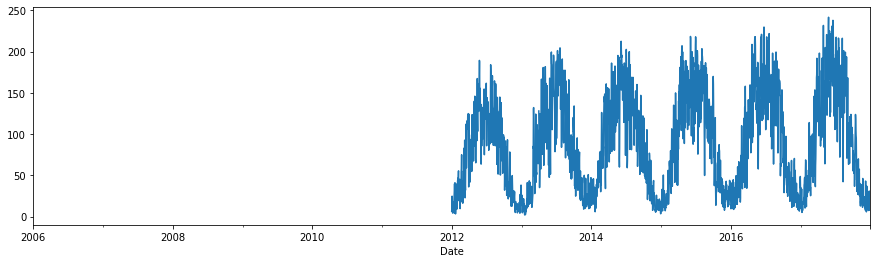

In [46]:
df_solar = df['Solar']

df_solar.plot(figsize=(15, 4))

Importiamo Seaborn e usiamo la funzione *set* per usare le sue impostazioni grafiche di default; è sufficiente fare questa operazione una sola volta, al momento dell'import.

In [47]:
import seaborn as sns
sns.set()

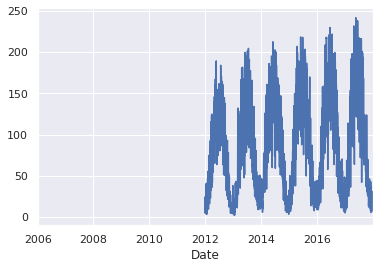

In [48]:
df_solar.plot()

Esempi di plot
---

La funzione plot accetta svariati argomenti opzionali.

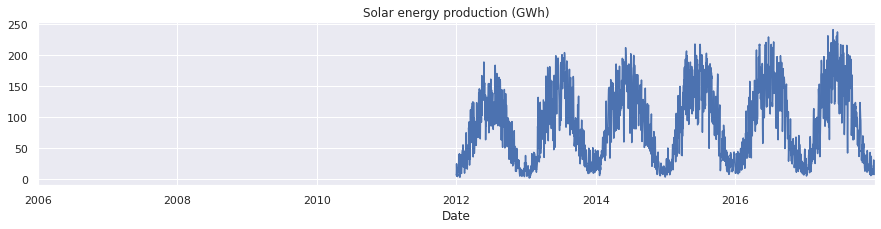

In [49]:
df_solar.plot(figsize=(15, 3), title='Solar energy production (GWh)')

Alcuni di questi sono ereditati da Matplotlib e non sono direttamente visibili nella documentazione. Qui troviamo una lista completa: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html

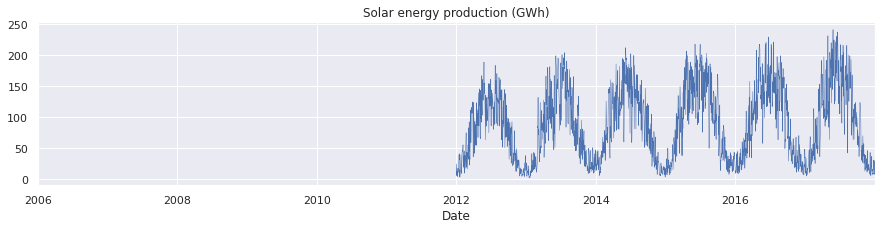

In [50]:
df_solar.plot(figsize=(15, 3), title='Solar energy production (GWh)', linewidth=.5)

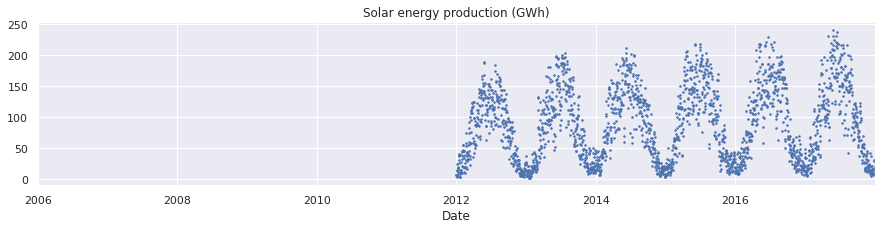

In [51]:
df_solar.plot(figsize=(15, 3),
              title='Solar energy production (GWh)',
              marker='.',
              markersize=3,
              linestyle='')

Notare come nei plot l'indicizzazione si adatti al livello di dettaglio dei dati.

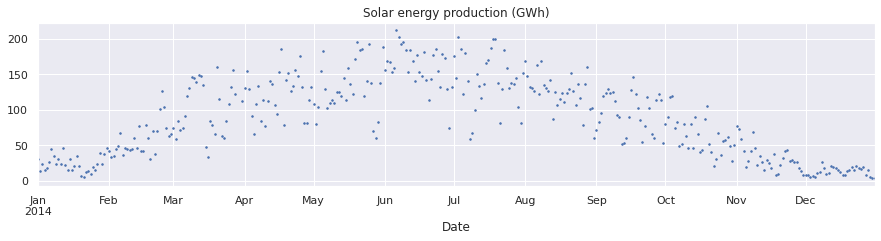

In [52]:
df_solar['2014'].plot(figsize=(15, 3),
                      title='Solar energy production (GWh)',
                      marker='.',
                      markersize=3,
                      linestyle='')

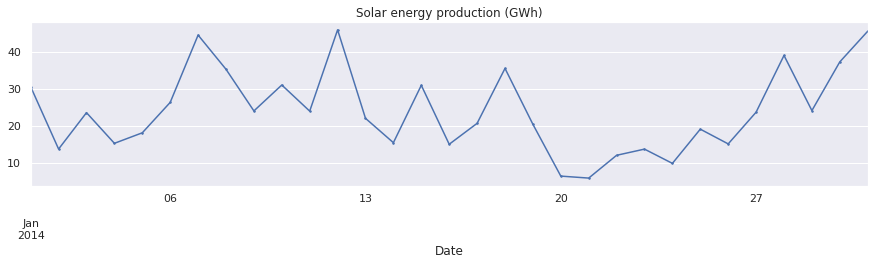

In [53]:
df_solar['2014-01'].plot(figsize=(15, 3),
                         title='Solar energy production (GWh)',
                         marker='.',
                         markersize=3,
                         linestyle='-')

Proviamo a visualizzare conteporaneamente le produzioni eolica e solare.

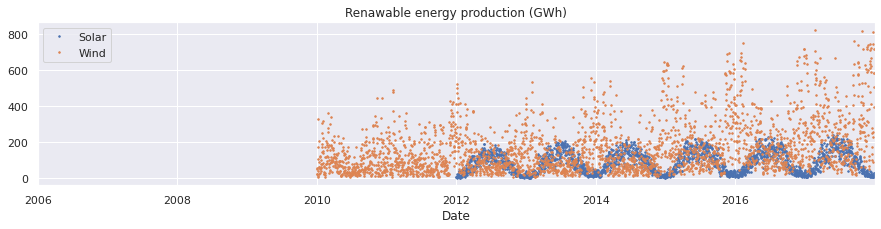

In [54]:
df_renewable = df[['Solar', 'Wind']]

df_renewable.plot(figsize=(15, 3),
                  title='Renawable energy production (GWh)',
                  marker='.',
                  markersize=3,
                  linestyle='')

Plot multipli
---
L'argomento *subplots* crea un plot per ogni colonna del dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f3148a128>,
      dtype=object)

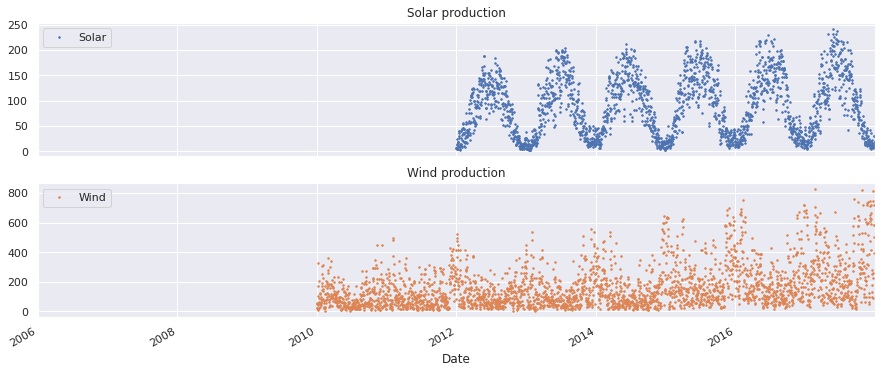

In [56]:
#separare grafici
subplots = df_renewable.plot(figsize=(15, 6),
                             marker='.',
                             markersize=3,
                             linestyle='',
                             title=['Solar production', 'Wind production'],
                             subplots=True)

subplots

La funzione plot di seaborn è una scorciatoia per quella omonima di matplotlib; a volte tocca passare da lì, per esempio quando voglio stampare due cose sullo stesso grafico. Supponiamo di voler differenziare il plot di solar e wind

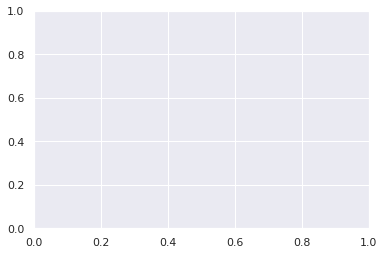

In [57]:
ax, figure = plt.subplots()

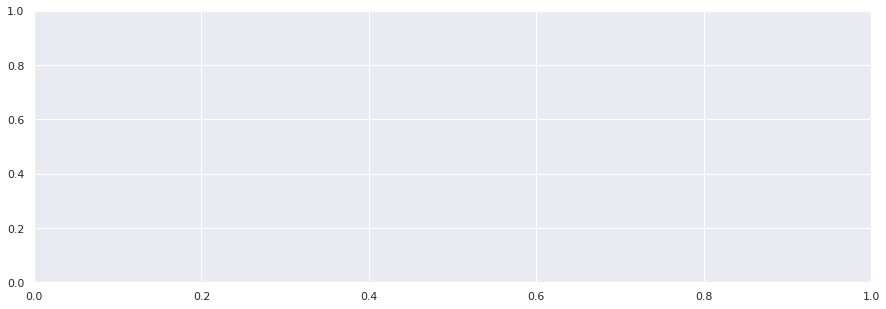

In [59]:
figure, ax = plt.subplots(figsize=(15, 5))

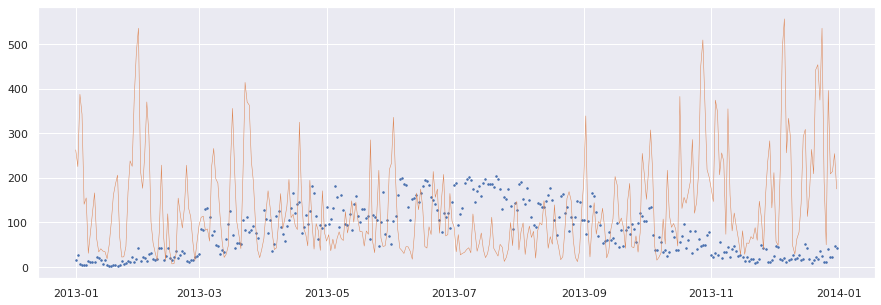

In [60]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Solar']['2013'], linestyle='', marker='.', markersize=3)
ax.plot(df['Wind']['2013'], linestyle='-', linewidth=0.5)

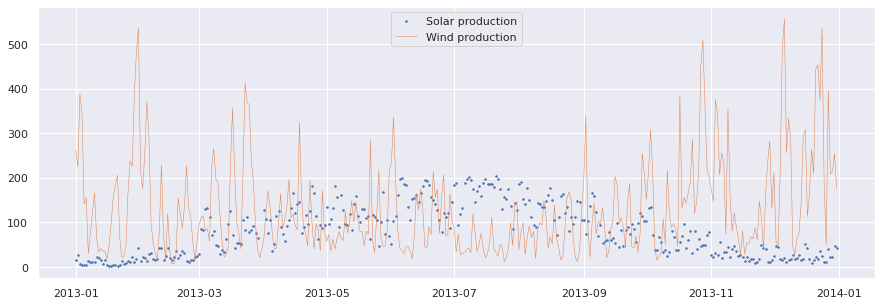

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Solar']['2013'], linestyle='', marker='.', markersize=3, label='Solar production')
ax.plot(df['Wind']['2013'], linestyle='-', linewidth=0.5, label='Wind production')
ax.legend()

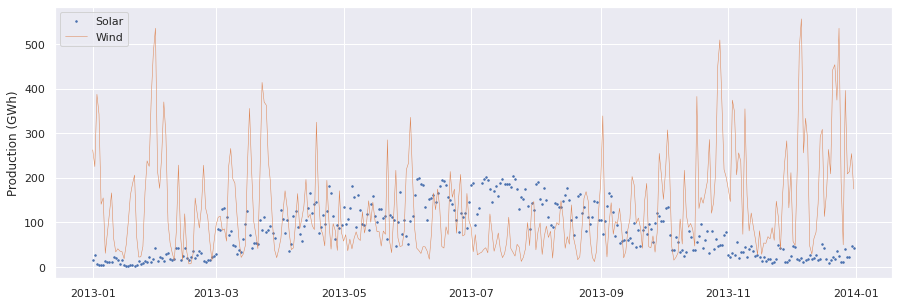

In [62]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Solar']['2013'], linestyle='', marker='.', markersize=3, label='Solar')
ax.plot(df['Wind']['2013'], linestyle='-', linewidth=0.5, label='Wind')
ax.set_ylabel('Production (GWh)')
ax.legend()

Ci vuole un po' a prendere confidenza con Matplotlib. Le buone notizie:

- ci si può fare praticamente tutto
- sul Web ci sono svariati di esempi di utilizzo.

Analisi della stagionalità
===

La tendenza di una variabile a ripetere periodicamente il suo comportamento nel tempo è detta *stagionalità*. 

Questa è chiara nella produzione di energia solare: si tratta di una stagionalità *annuale* dovuta al quantità di luce solare. La stagionalità non è per forza meteorologica: pansate alle vendite sotto Natale.

Esercizio 1.2
---

Usare la funzione plot e gli strumenti Pandas visti in precedenza per visualizzare il consumo di energia elettrica. Che tipo di stagionalità ha questa variabile? Come si può interpretare?

abbiamo fatto lo zoom su un periodo particolare; adesso vogliamo analizzare la stagionalità media della time series

*groupby*
---

In [68]:
df['Month'] = df.index.month_name()

df.head()

,Consumption,Wind,Solar,Month
Date,,,,
2006-01-01,1069.184,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,January


In [69]:
df.groupby('Month').mean()

,Consumption,Wind,Solar
Month,,,
April,1298.457644,148.644725,119.734933
August,1249.991327,109.350778,138.778575
December,1374.364568,277.566526,20.068538
February,1452.463841,206.942903,43.846735
January,1433.781435,207.716480,19.569602
July,1266.701788,112.376440,150.746720
June,1263.169508,114.812058,152.569494
March,1380.694497,174.218785,88.038121
May,1261.905065,129.161601,139.967312


In [70]:
df.groupby('Month', sort=False).mean()

,Consumption,Wind,Solar
Month,,,
January,1433.781435,207.716480,19.569602
February,1452.463841,206.942903,43.846735
March,1380.694497,174.218785,88.038121
April,1298.457644,148.644725,119.734933
May,1261.905065,129.161601,139.967312
June,1263.169508,114.812058,152.569494
July,1266.701788,112.376440,150.746720
August,1249.991327,109.350778,138.778575
September,1314.348716,127.731125,103.247256


In [71]:
df.groupby('Month', sort=False)['Solar'].mean()

Month
January       19.569602
February      43.846735
March         88.038121
April        119.734933
May          139.967312
June         152.569494
July         150.746720
August       138.778575
September    103.247256
October       61.328371
November      30.869122
December      20.068538
Name: Solar, dtype: float64

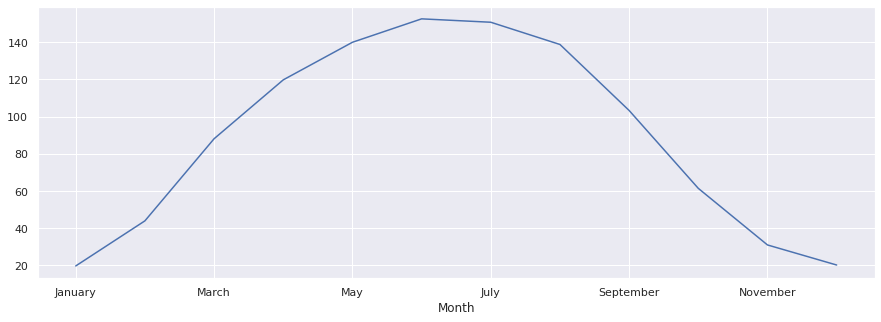

In [72]:
df.groupby('Month', sort=False)['Solar'].mean().plot(figsize=(15, 5))

Boxplots
---

alternativa a groupby

oltre a plot seaborn ha funzioni separate per ogni tipo di grafico; la funzione boxplot usata direttamente permette di raggruppare per una colonna

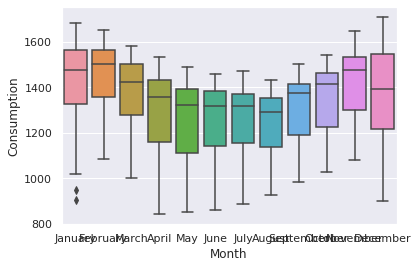

In [73]:
sns.boxplot('Month', 'Consumption', data=df)

figsize non è direttamente disponibile; occorre passare da matplotlib

come si legge? analisi stagionalità mensile

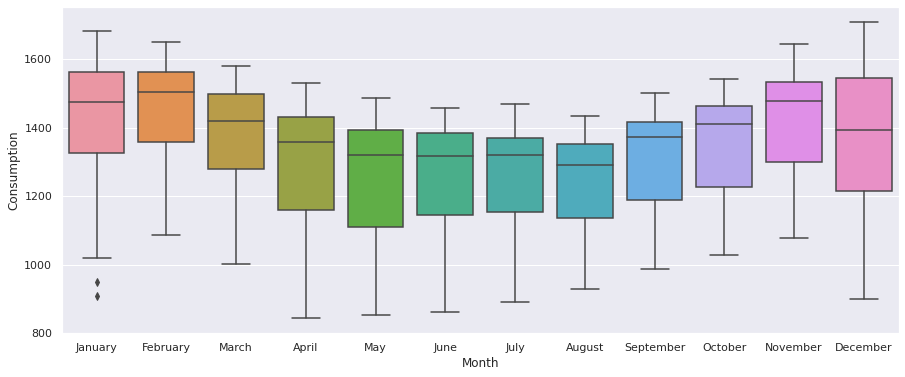

In [74]:
plt.figure(figsize=(15, 6))
sns.boxplot('Month', 'Consumption', data=df)

Esercizio 1.3
---
analisi stagionalità settimanale consumo con groupby e boxplot

Resampling
---
upsampling vs dowsampling; strumento valido per analisi stagionalità

In [78]:
df_consumption_spring2013 = df['Consumption']['2013-03-21':'2013-06-20']
df_consumption_spring2013

Date
2013-03-21    1407.382
2013-03-22    1383.170
2013-03-23    1200.663
2013-03-24    1105.345
2013-03-25    1340.939
                ...   
2013-06-16     947.157
2013-06-17    1296.348
2013-06-18    1328.223
2013-06-19    1332.107
2013-06-20    1323.408
Name: Consumption, Length: 92, dtype: float64

In [79]:
df_consumption_spring2013.resample('W')

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [80]:
df_consumption_spring2013.resample('W').mean()

Date
2013-03-24    1274.140000
2013-03-31    1225.623571
2013-04-07    1264.175571
2013-04-14    1278.603143
2013-04-21    1247.121286
2013-04-28    1246.434286
2013-05-05    1187.129714
2013-05-12    1181.149286
2013-05-19    1216.388857
2013-05-26    1179.325857
2013-06-02    1165.471429
2013-06-09    1190.125429
2013-06-16    1194.735857
2013-06-23    1320.021500
Freq: W-SUN, Name: Consumption, dtype: float64

In [81]:
df_consumption_spring2013.resample('W', label='left').mean()#argomenti

Date
2013-03-17    1274.140000
2013-03-24    1225.623571
2013-03-31    1264.175571
2013-04-07    1278.603143
2013-04-14    1247.121286
2013-04-21    1246.434286
2013-04-28    1187.129714
2013-05-05    1181.149286
2013-05-12    1216.388857
2013-05-19    1179.325857
2013-05-26    1165.471429
2013-06-02    1190.125429
2013-06-09    1194.735857
2013-06-16    1320.021500
Freq: W-SUN, Name: Consumption, dtype: float64

In [82]:
df_consumption_spring2013_weekly = df_consumption_spring2013.resample('W').mean()

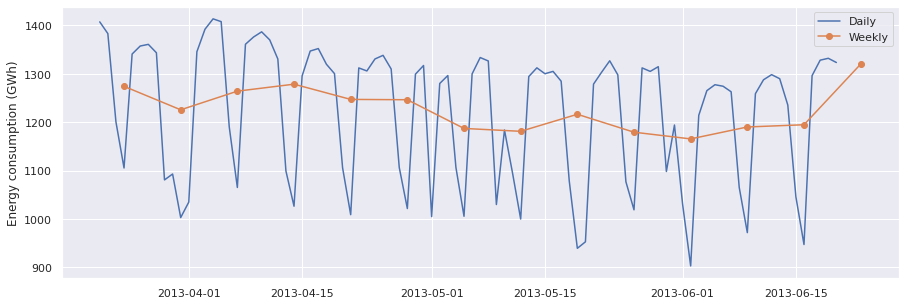

In [83]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df_consumption_spring2013, label='Daily')
ax.plot(df_consumption_spring2013_weekly, marker='o', label='Weekly')
ax.set_ylabel('Energy consumption (GWh)')
ax.legend()

commento: cancellazione frequenze minori o uguali della scala di resampling

Esercizio 1.4
---
confronto tra produzione rinnovabile e consumo, a livello mensile; andamento rapporto tra le due quantità, a livello annuale

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>